# **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

# **Data Loading**

In [ ]:
file_path = '/content/Products_Data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

Brand                Model       Price Number of Ratings Display Size  \
0  Infinix           Zero 40 4G   Rs.70,000                23  6.78 inches   
1  Samsung      Galaxy Z Flip 6  Rs.385,000                39   6.7 inches   
2  Samsung      Galaxy Z Fold 6  Rs.605,000                45   7.6 inches   
3  Samsung           Galaxy A05   Rs.25,000                56   6.7 inches   
4    Tecno  Phantom V Fold 2 5G  Rs.370,000                37  7.85 inches   

    RAM  Battery Internal Memory  
0   8GB   500mAh           256GB  
1  12GB  4000mAh           512GB  
2  12GB  4400mAh           512GB  
3   4GB  5000mAh            64GB  
4  12GB  5750mAh           512GB

In [ ]:
data.tail()

Brand           Model      Price Number of Ratings  \
1340    gfive     GFive Disco  Rs  3,199                59   
1341    gfive     GFive Spark  Rs  2,325         3 Ratings   
1342  e-tachi    E-Tachi E888  Rs  3,749                38   
1343    sparx   SparX Edge 20  Rs  5,000                24   
1344    gfive  GFive 4G Style  Rs  6,999                39   

            Display Size              RAM          Battery Internal Memory  
1340   2.4 InchesDisplay         32 MBRAM  3000 mAhBattery           32 MB  
1341   1.8 inchesDisplay         32 MBRAM  3000 mAhBattery           32 MB  
1342   2.8 InchesDisplay         32 MBRAM  3000 mAhBattery           32 MB  
1343  6.67 inchesDisplay  8GB+8GB  RAMRAM  5000 mAhBattery          256 GB  
1344     2.8 InchDisplay           2GBRAM  4000 mAhBattery            16gb

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              1345 non-null   object
 1   Model              1345 non-null   object
 2   Price              1345 non-null   object
 3   Number of Ratings  1345 non-null   object
 4   Display Size       1345 non-null   object
 5   RAM                1345 non-null   object
 6   Battery            1345 non-null   object
 7   Internal Memory    1345 non-null   object
dtypes: object(8)
memory usage: 84.2+ KB


In [ ]:
data.describe()

Brand             Model      Price Number of Ratings Display Size  \
count      1345              1345       1345              1345         1345   
unique       63               689        457               204          142   
top     Samsung  Galaxy S24 Ultra  Rs.25,000                 2   6.6 inches   
freq        182                14         34                92          135   

         RAM  Battery Internal Memory  
count   1345     1345            1345  
unique   112       98              70  
top      8GB  5000mAh           128GB  
freq     339      712             340

#**Data consistency**

In [ ]:
def clean_price(value):
    # Convert value to string to handle cases with numbers and strings
    value = str(value).strip()  # Remove leading/trailing whitespace

    # Check for strings representing null values
    null_values = ["Price Not Available", "price Not Available"]
    if value in null_values:
        return np.nan  # Using np.nan for better compatibility with pandas

    # Normalize whitespace and remove currency symbols and commas
    cleaned_value = value.replace('Rs.', '').replace('Rs', '').replace(',', '').strip()
    cleaned_value = ' '.join(cleaned_value.split())  # Normalize multiple spaces to a single space

    # Directly convert cleaned value to float
    return float(cleaned_value)


data['Price'] = data['Price'].apply(clean_price)
output_file_path = '/content/Cleaned_Products_Data.csv'
data.to_csv(output_file_path, index=False)

data.head()

Brand                Model     Price Number of Ratings Display Size  \
0  Infinix           Zero 40 4G   70000.0                23  6.78 inches   
1  Samsung      Galaxy Z Flip 6  385000.0                39   6.7 inches   
2  Samsung      Galaxy Z Fold 6  605000.0                45   7.6 inches   
3  Samsung           Galaxy A05   25000.0                56   6.7 inches   
4    Tecno  Phantom V Fold 2 5G  370000.0                37  7.85 inches   

    RAM  Battery Internal Memory  
0   8GB   500mAh           256GB  
1  12GB  4000mAh           512GB  
2  12GB  4400mAh           512GB  
3   4GB  5000mAh            64GB  
4  12GB  5750mAh           512GB

In [ ]:
def clean_number_of_ratings(value):
    # Remove any non-numeric characters and strip the value
    numeric_part = ''.join(filter(str.isdigit, str(value)))
    try:
        # Attempt to convert the cleaned string to an integer if it's not empty
        return int(numeric_part) if numeric_part else np.nan
    except ValueError:
        # Return NaN if conversion fails
        return np.nan

data['Number of Ratings'] = data['Number of Ratings'].apply(clean_number_of_ratings)
data.to_csv(output_file_path, index=False)

data.head()

Brand                Model     Price  Number of Ratings Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23  6.78 inches   
1  Samsung      Galaxy Z Flip 6  385000.0                 39   6.7 inches   
2  Samsung      Galaxy Z Fold 6  605000.0                 45   7.6 inches   
3  Samsung           Galaxy A05   25000.0                 56   6.7 inches   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37  7.85 inches   

    RAM  Battery Internal Memory  
0   8GB   500mAh           256GB  
1  12GB  4000mAh           512GB  
2  12GB  4400mAh           512GB  
3   4GB  5000mAh            64GB  
4  12GB  5750mAh           512GB

In [ ]:
def extract_screen_size(text):
    # Use a regular expression to find the first floating-point number in the string
    match = re.search(r'\d+(\.\d+)?', text)
    return float(match.group()) if match else None


data['Display Size'] = data['Display Size'].apply(extract_screen_size)
data.to_csv(output_file_path, index=False)

data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23          6.78   
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   

    RAM  Battery Internal Memory  
0   8GB   500mAh           256GB  
1  12GB  4000mAh           512GB  
2  12GB  4400mAh           512GB  
3   4GB  5000mAh            64GB  
4  12GB  5750mAh           512GB

In [ ]:
def clean_ram(ram_value):
    # Remove 'RAM' and unnecessary text in parentheses
    ram_value = ram_value.replace('RAM', '').strip()
    ram_value = re.sub(r'\(.*?\)', '', ram_value)  # Remove text within parentheses

    # Split the string by common delimiters
    ram_values = re.split(r'[+,/]', ram_value)  # Split by +, , or /

    # Initialize a list to store numeric values
    numeric_values = []

    # Process each split value
    for value in ram_values:
        value = value.strip()  # Clean leading/trailing spaces

        # Extract GB values
        match = re.findall(r'(\d+)\s*GB', value)
        if match:
            numeric_values.extend([float(num) for num in match])  # Add GB values to the list
        else:
            # Extract MB values and convert to GB
            match = re.findall(r'(\d+)\s*MB', value)
            if match:
                numeric_values.extend([float(num) / 1024 for num in match])  # Convert MB to GB

    # Return the maximum value found or NaN if no valid values
    return min(numeric_values) if numeric_values else np.nan


data['RAM'] = data['RAM'].apply(clean_ram)
data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23          6.78   
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   

    RAM  Battery Internal Memory  
0   8.0   500mAh           256GB  
1  12.0  4000mAh           512GB  
2  12.0  4400mAh           512GB  
3   4.0  5000mAh            64GB  
4  12.0  5750mAh           512GB

In [ ]:
def convert_battery_values(battery_list):
    converted_values = []

    for battery in battery_list:
        match = re.search(r'(\d+)', battery)

        if match:
            num_value = float(match.group(1))
            if 'Wh' in battery:
                mAh_value = (num_value * 1000) / 3.7
                converted_values.append(round(mAh_value, 2))
            else:
                converted_values.append(num_value)
        else:
            converted_values.append(None)

    return converted_values

data['Battery'] = convert_battery_values(data['Battery'])
# data['converted_battery']
# data.to_csv(output_file_path, index=False)


data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23          6.78   
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   

    RAM  Battery Internal Memory  
0   8.0    500.0           256GB  
1  12.0   4000.0           512GB  
2  12.0   4400.0           512GB  
3   4.0   5000.0            64GB  
4  12.0   5750.0           512GB

In [ ]:
def convert_memory_values(memory_list):
    converted_values = []

    for memory in memory_list:
        # Normalize the format: remove whitespace and convert to upper case
        memory = memory.replace(" ", "").upper()

        # Handle multiple values and strip units
        values = re.findall(r'(\d+)', memory)  # Extract numeric parts
        if values:
            # Convert extracted values to floats and handle units
            numeric_values = [float(v) for v in values]

            # Check for original units to decide conversion
            if "MB" in memory:
                # Convert MB to GB (1 GB = 1024 MB)
                numeric_values = [v / 1024 for v in numeric_values]

            # Change to max, min, or another metric as per your analysis needs
            converted_values.append(np.mean(numeric_values))  # Average of values
        else:
            converted_values.append(None)  # Handle cases with no valid numbers

    return converted_values


data['Internal Memory'] = convert_memory_values(data['Internal Memory'])
output_file_path = '/content/Cleaned_Products_Data.csv'
data.to_csv(output_file_path, index=False)

data.head()


Brand                Model     Price  Number of Ratings  Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23          6.78   
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   

    RAM  Battery  Internal Memory  
0   8.0    500.0            256.0  
1  12.0   4000.0            512.0  
2  12.0   4400.0            512.0  
3   4.0   5000.0             64.0  
4  12.0   5750.0            512.0

# **Data Cleaning and Exploration**

In [ ]:
data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
0  Infinix           Zero 40 4G   70000.0                 23          6.78   
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   

    RAM  Battery  Internal Memory  
0   8.0    500.0            256.0  
1  12.0   4000.0            512.0  
2  12.0   4400.0            512.0  
3   4.0   5000.0             64.0  
4  12.0   5750.0            512.0

In [ ]:
data.tail()

Brand           Model   Price  Number of Ratings  Display Size  \
1340    gfive     GFive Disco  3199.0                 59          2.40   
1341    gfive     GFive Spark  2325.0                  3          1.80   
1342  e-tachi    E-Tachi E888  3749.0                 38          2.80   
1343    sparx   SparX Edge 20  5000.0                 24          6.67   
1344    gfive  GFive 4G Style  6999.0                 39          2.80   

          RAM  Battery  Internal Memory  
1340  0.03125   3000.0          0.03125  
1341  0.03125   3000.0          0.03125  
1342  0.03125   3000.0          0.03125  
1343  8.00000   5000.0        256.00000  
1344  2.00000   4000.0         16.00000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1345 non-null   object 
 1   Model              1345 non-null   object 
 2   Price              1329 non-null   float64
 3   Number of Ratings  1345 non-null   int64  
 4   Display Size       1345 non-null   float64
 5   RAM                1339 non-null   float64
 6   Battery            1343 non-null   float64
 7   Internal Memory    1345 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 84.2+ KB


In [ ]:
data.isna().sum()

Brand                 0
Model                 0
Price                16
Number of Ratings     0
Display Size          0
RAM                   6
Battery               2
Internal Memory       0
dtype: int64

In [ ]:
# Calculate the threshold for 5% of the dataset size
threshold = 0.05 * len(data)
print(threshold)

missing_values = data.isna().sum()

# Loop through each column and remove rows with missing values if the count is below the threshold
for column, missing_count in missing_values.items():
    if missing_count > 0 and missing_count <= threshold:
        data = data[data[column].notna()]  # Remove rows where the column has missing values

# Verify the result to ensure rows with missing values were removed
data.isna().sum()

# output_file_path = '/content/Cleaned_Products_Data.csv'
# data.to_csv(output_file_path, index=False)


67.25


Brand                0
Model                0
Price                0
Number of Ratings    0
Display Size         0
RAM                  0
Battery              0
Internal Memory      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1321 non-null   object 
 1   Model              1321 non-null   object 
 2   Price              1321 non-null   float64
 3   Number of Ratings  1321 non-null   int64  
 4   Display Size       1321 non-null   float64
 5   RAM                1321 non-null   float64
 6   Battery            1321 non-null   float64
 7   Internal Memory    1321 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 92.9+ KB


In [ ]:
print(data.shape)
data.describe()

(1321, 8)


Price  Number of Ratings  Display Size          RAM  \
count    1321.000000        1321.000000   1321.000000  1321.000000   
mean    94990.382286          36.120363      6.250210     7.019777   
std    134932.889057          66.086627      1.178786    17.936991   
min      2250.000000           2.000000      0.000000     0.003906   
25%     23299.000000           5.000000      6.500000     4.000000   
50%     40000.000000          19.000000      6.600000     6.000000   
75%     90000.000000          43.000000      6.700000     8.000000   
max    735000.000000         991.000000      7.850000   512.000000   

             Battery  Internal Memory  
count    1321.000000      1321.000000  
mean     6015.367108       166.005358  
std     30583.428131       131.648996  
min        30.000000         0.003906  
25%      5000.000000        64.000000  
50%      5000.000000       128.000000  
75%      5000.000000       256.000000  
max    945945.950000       512.000000

In [ ]:
print("Before Removing:", data.shape)
data.drop_duplicates(inplace=True)
print("After Removing:", data.shape)


Before Removing: (1321, 8)
After Removing: (1263, 8)


In [ ]:
skewness = data[['Price', 'Number of Ratings', 'Display Size', 'RAM', 'Internal Memory']].skew()
print("Skewness of each column:")
skewness


Skewness of each column:


Price                 2.334930
Number of Ratings     6.886896
Display Size         -2.758634
RAM                  21.021897
Internal Memory       1.190465
dtype: float64

--- Detection of outliers in Number of Ratings ---
Before removing outliers: Box plot of Number of Ratings


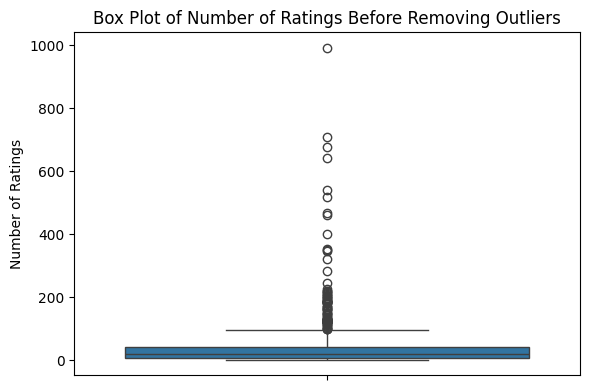

Total outliers detected in Number of Ratings: 87
After removing outliers: Box plot of Number of Ratings


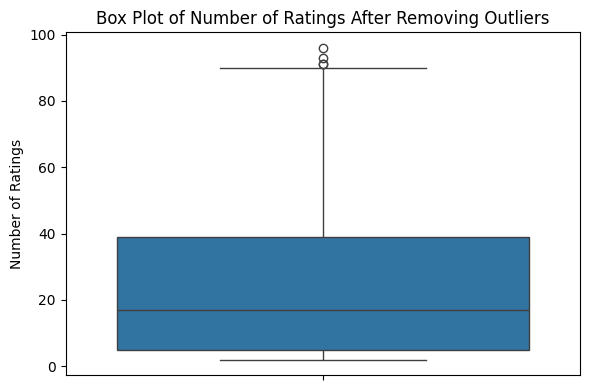



--- Detection of outliers in RAM ---
Before removing outliers: Box plot of RAM


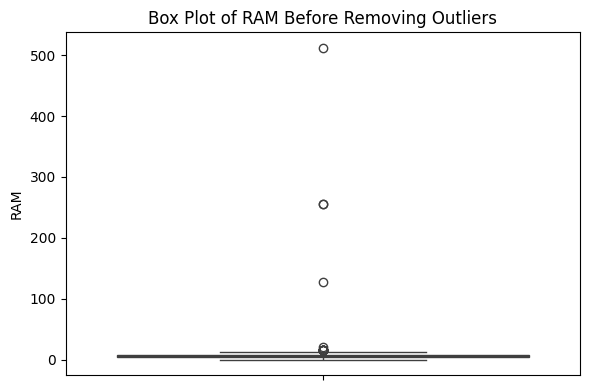

Total outliers detected in RAM: 15
After removing outliers: Box plot of RAM


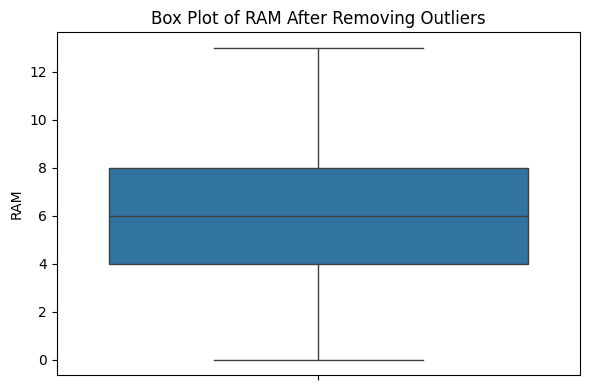



--- Detection of outliers in Internal Memory ---
Before removing outliers: Box plot of Internal Memory


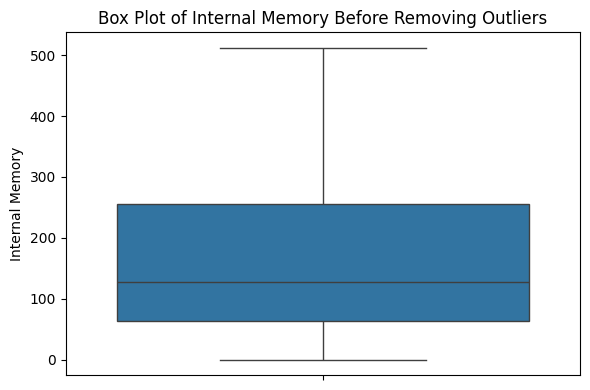

Total outliers detected in Internal Memory: 0
After removing outliers: Box plot of Internal Memory


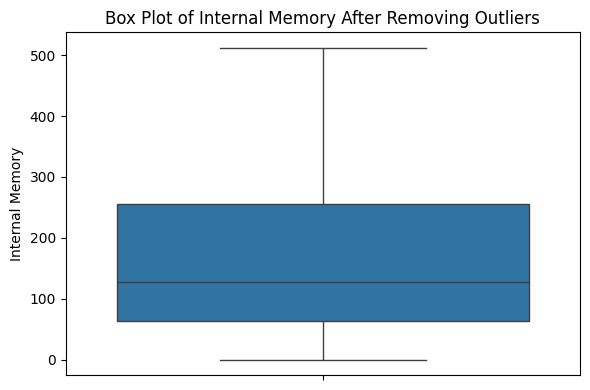

In [ ]:
# Detect outliers using IQR and visualize with box plots before and after removing outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Plotting function for box plots
def plot_boxplot(data, column, title):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[column])
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Columns to analyze
columns_to_analyze = ['Number of Ratings', 'RAM', 'Internal Memory']

# Loop through each column to detect outliers and visualize the process
for column in columns_to_analyze:
    print(f"--- Detection of outliers in {column} ---")

    # Box plot before removing outliers
    print(f"Before removing outliers: Box plot of {column}")
    plot_boxplot(data, column, title=f'Box Plot of {column} Before Removing Outliers')

    # Detect and count outliers
    outliers = detect_outliers_iqr(data, column)
    print(f"Total outliers detected in {column}: {len(outliers)}")

    # if len(outliers) > 0:
    #     print(f"Outlier values in {column} that will be removed:")
    #     print(outliers[column].values)
    # else:
    #     print(f"No outliers detected in {column}.")

    # Remove outliers from the data
    data = data[~data.index.isin(outliers.index)]

    # Box plot after removing outliers
    print(f"After removing outliers: Box plot of {column}")
    plot_boxplot(data, column, title=f'Box Plot of {column} After Removing Outliers')
    print("\n" + "="*50 + "\n")

# Save the cleaned data after outlier removal
output_file_path = '/content/Cleaned_Products_Data_After_Outlier_Removal.csv'
data.to_csv(output_file_path, index=False)


In [ ]:
data['Battery'].describe()

count      1161.000000
mean       6166.849225
std       32620.247774
min          30.000000
25%        4500.000000
50%        5000.000000
75%        5000.000000
max      945945.950000
Name: Battery, dtype: float64

In [ ]:
len1=data.shape[0]
data = data[(data['Battery'] >= 700) & (data['Battery'] <= 10000)]
len2=data.shape[0]

In [ ]:
data['Battery'].describe()

count    1146.000000
mean     4688.028796
std       854.633803
min       800.000000
25%      4600.000000
50%      5000.000000
75%      5000.000000
max      7200.000000
Name: Battery, dtype: float64

In [ ]:
print(data.shape)

(1146, 8)


In [ ]:
data.describe()

Price  Number of Ratings  Display Size          RAM  \
count    1146.000000        1146.000000   1146.000000  1146.000000   
mean   100987.728621          23.294939      6.263312     6.024508   
std    139757.865369          19.837777      1.159922     3.251012   
min      2250.000000           2.000000      0.000000     0.003906   
25%     24000.000000           5.000000      6.500000     4.000000   
50%     40499.500000          17.000000      6.600000     6.000000   
75%    100000.000000          38.750000      6.700000     8.000000   
max    735000.000000          96.000000      7.850000    13.000000   

           Battery  Internal Memory  
count  1146.000000      1146.000000  
mean   4688.028796       169.367981  
std     854.633803       133.790231  
min     800.000000         0.003906  
25%    4600.000000        64.000000  
50%    5000.000000       128.000000  
75%    5000.000000       256.000000  
max    7200.000000       512.000000

In [ ]:
data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   
5    Tecno  Phantom V Flip 2 5G  200000.0                 20          6.90   

    RAM  Battery  Internal Memory  
1  12.0   4000.0            512.0  
2  12.0   4400.0            512.0  
3   4.0   5000.0             64.0  
4  12.0   5750.0            512.0  
5   8.0   4720.0            256.0

# **Data Transformation**

In [ ]:
# columns_to_standardize = ['Price', 'Number of Ratings', 'Battery', 'RAM', 'Display Size', 'Internal Memory']

# # Initialize the Standard Scaler
# scaler = StandardScaler()

# # Fit and transform the data
# data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
# # Save the cleaned data after outlier removal
# output_file_path = '/content/standardScalar.csv'
# data.to_csv(output_file_path, index=False)

In [ ]:
data.head()

Brand                Model     Price  Number of Ratings  Display Size  \
1  Samsung      Galaxy Z Flip 6  385000.0                 39          6.70   
2  Samsung      Galaxy Z Fold 6  605000.0                 45          7.60   
3  Samsung           Galaxy A05   25000.0                 56          6.70   
4    Tecno  Phantom V Fold 2 5G  370000.0                 37          7.85   
5    Tecno  Phantom V Flip 2 5G  200000.0                 20          6.90   

    RAM  Battery  Internal Memory  
1  12.0   4000.0            512.0  
2  12.0   4400.0            512.0  
3   4.0   5000.0             64.0  
4  12.0   5750.0            512.0  
5   8.0   4720.0            256.0

In [ ]:
data.tail()

Brand           Model   Price  Number of Ratings  Display Size  \
1340    gfive     GFive Disco  3199.0                 59          2.40   
1341    gfive     GFive Spark  2325.0                  3          1.80   
1342  e-tachi    E-Tachi E888  3749.0                 38          2.80   
1343    sparx   SparX Edge 20  5000.0                 24          6.67   
1344    gfive  GFive 4G Style  6999.0                 39          2.80   

          RAM  Battery  Internal Memory  
1340  0.03125   3000.0          0.03125  
1341  0.03125   3000.0          0.03125  
1342  0.03125   3000.0          0.03125  
1343  8.00000   5000.0        256.00000  
1344  2.00000   4000.0         16.00000

# **DELEVERABLE 2**

  # **DATA VISUALIZATION AND ANALYSIS**

# **Univariate Analysis**

**Numerical columns**

Statistics for Price:
Mean: 100987.72862129145
Median: 40499.5
Mode: 25000.0
Standard Deviation: 139757.86536916465



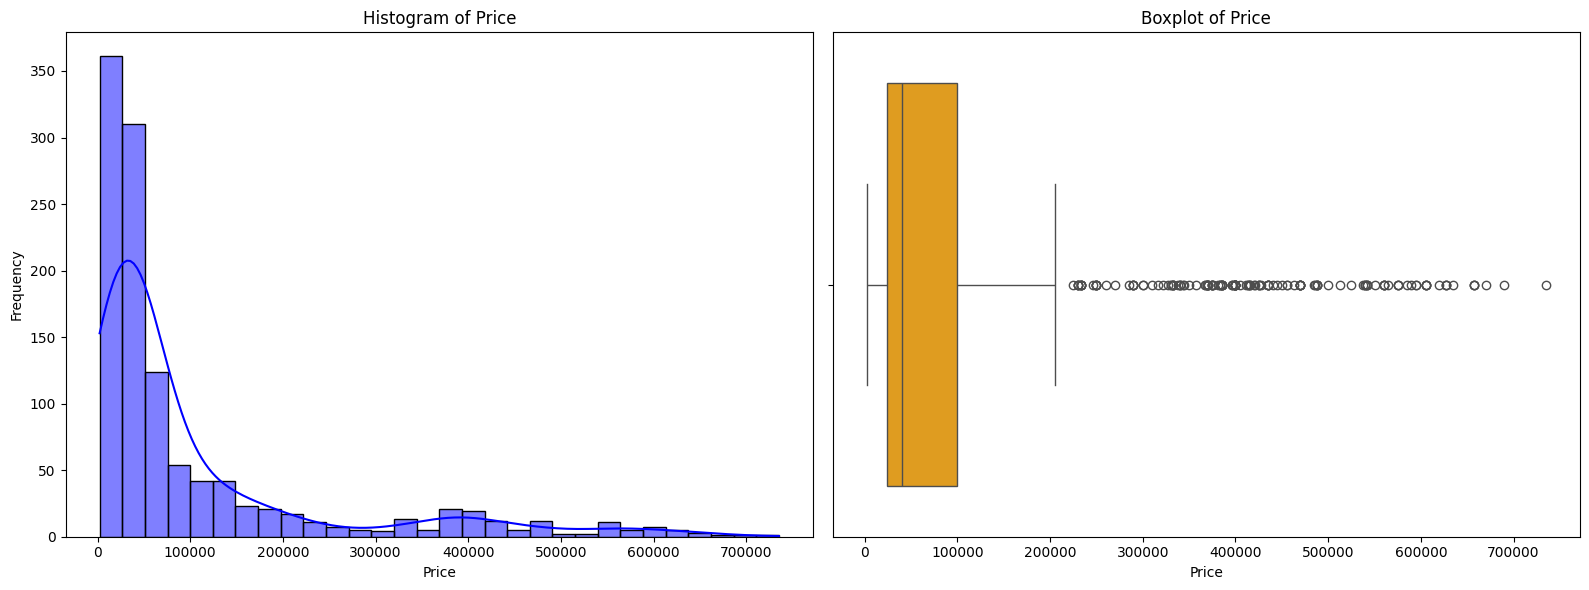

Statistics for Number of Ratings:
Mean: 23.294938917975568
Median: 17.0
Mode: 3
Standard Deviation: 19.837776821262974



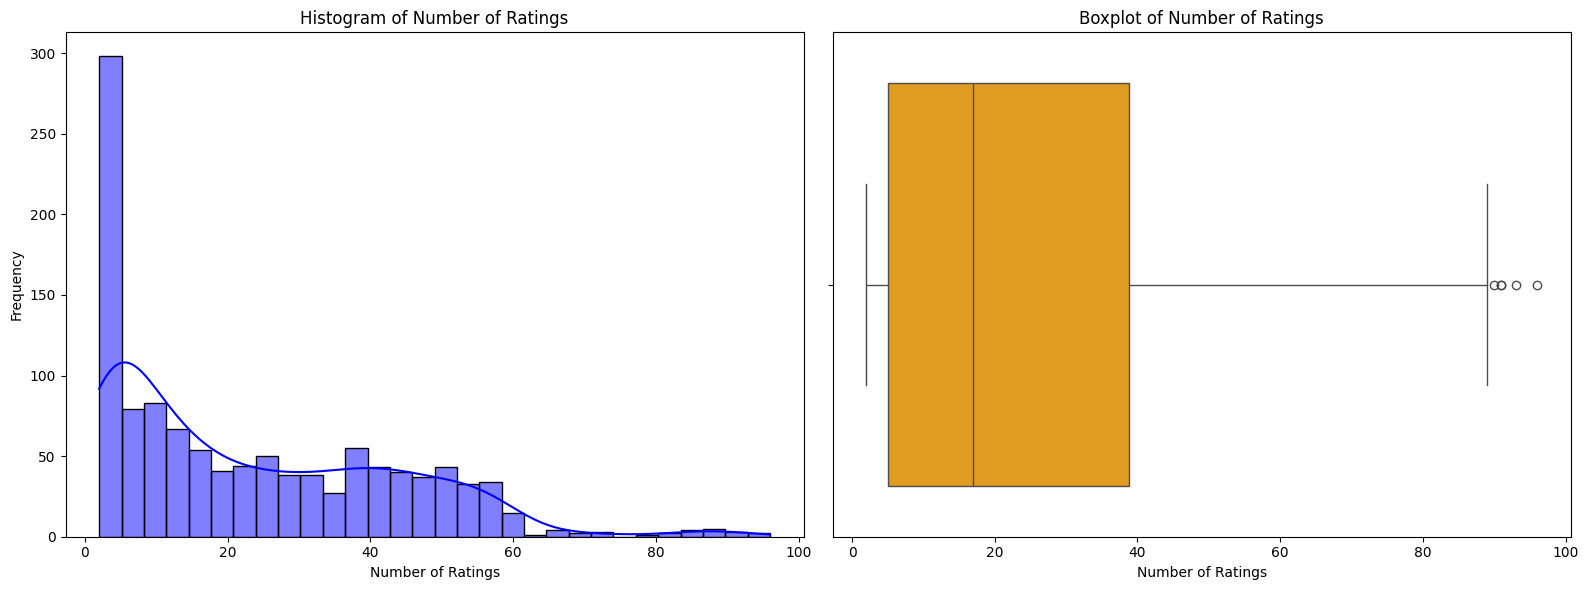

Statistics for Display Size:
Mean: 6.263312390924956
Median: 6.6
Mode: 6.6
Standard Deviation: 1.1599217320998085



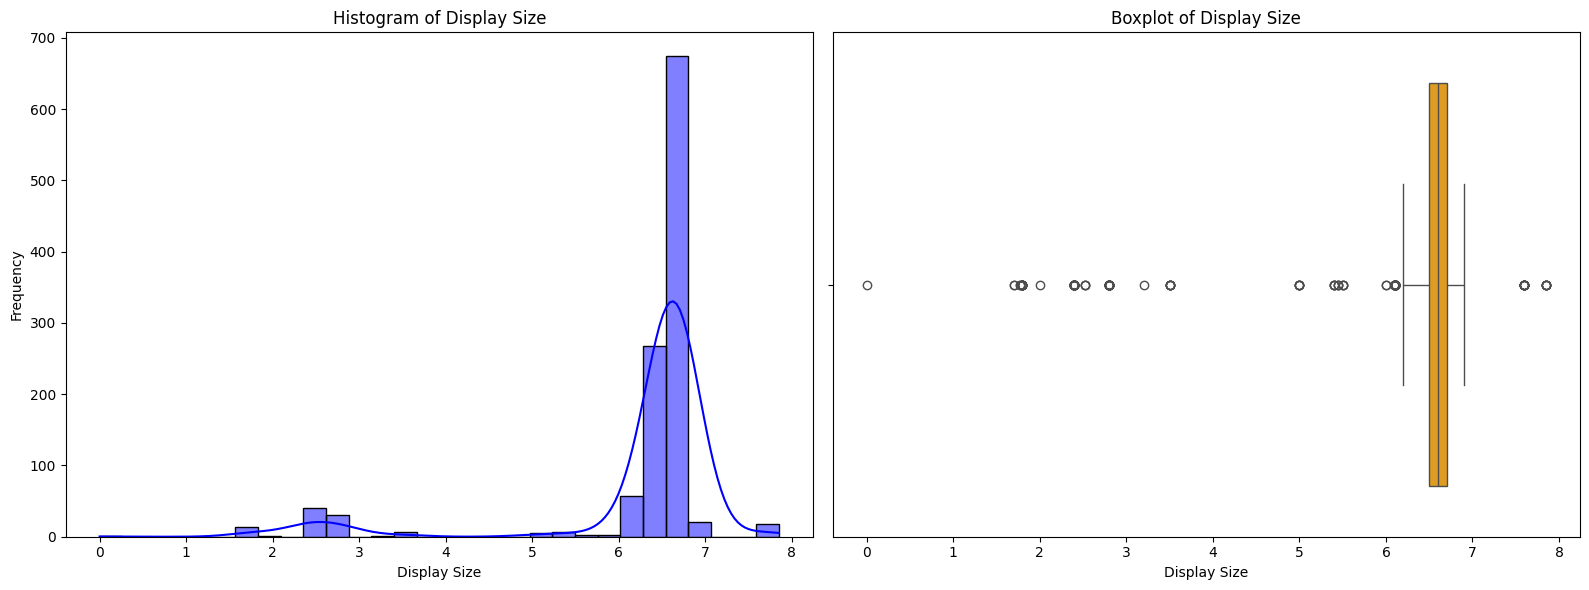

Statistics for RAM:
Mean: 6.02450779886562
Median: 6.0
Mode: 8.0
Standard Deviation: 3.251011984452837



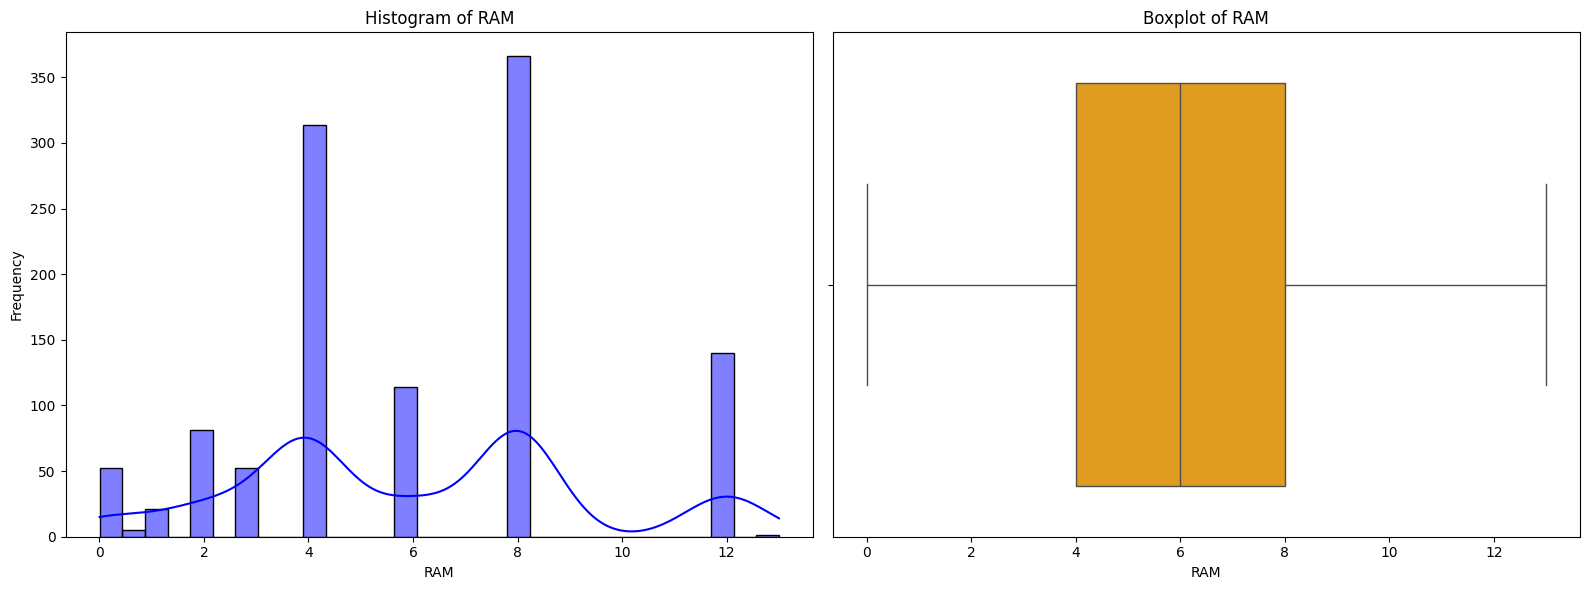

Statistics for Battery:
Mean: 4688.028795811519
Median: 5000.0
Mode: 5000.0
Standard Deviation: 854.6338034706471



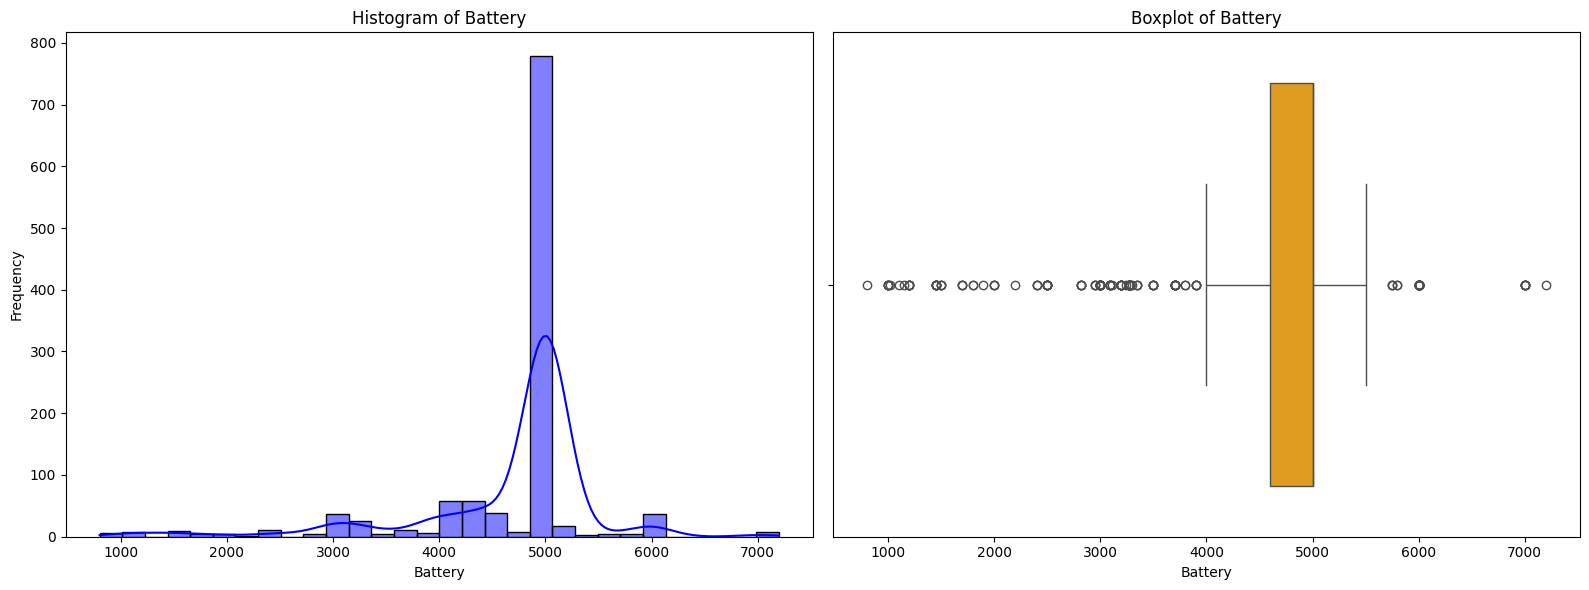

Statistics for Internal Memory:
Mean: 169.36798056646307
Median: 128.0
Mode: 128.0
Standard Deviation: 133.79023064525535



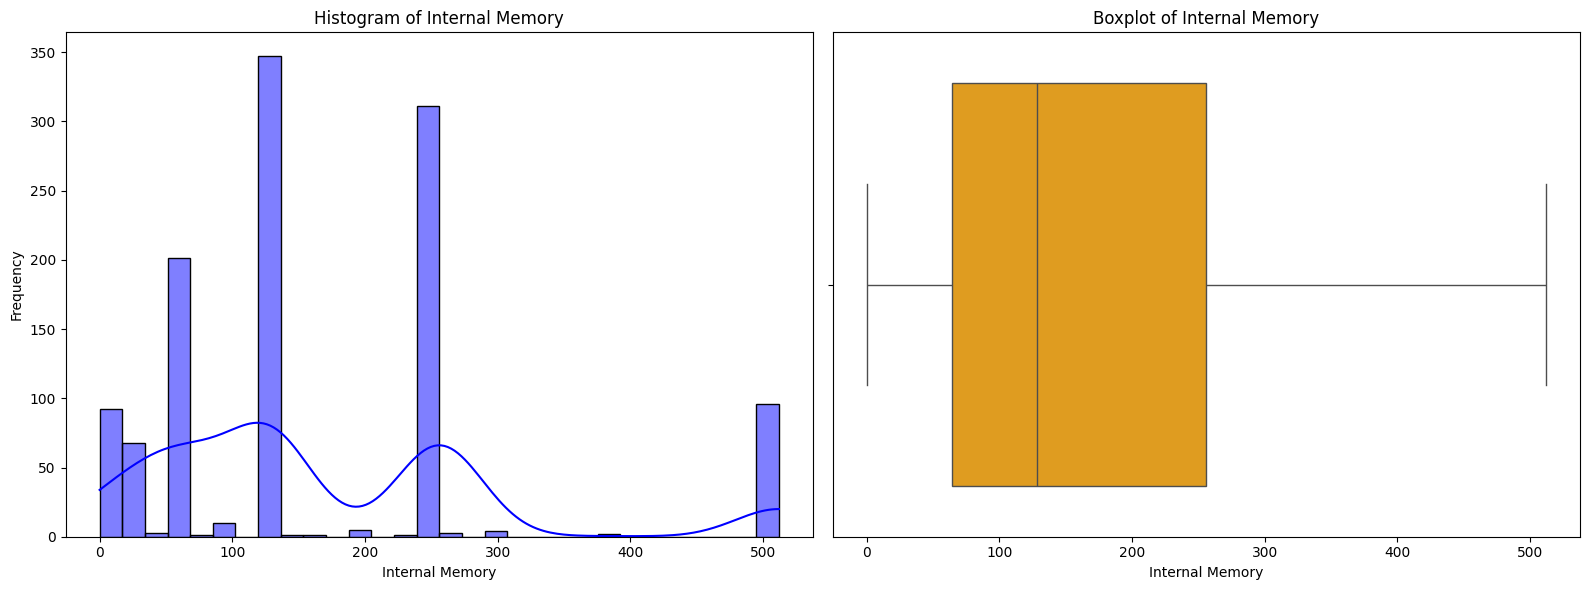

In [ ]:
def analyze_numerical(data, column):
    print(f"Statistics for {column}:")
    print(f"Mean: {data[column].mean()}")
    print(f"Median: {data[column].median()}")
    print(f"Mode: {data[column].mode()[0]}")
    print(f"Standard Deviation: {data[column].std()}\n")

    # Visualizations: Histogram and Boxplot
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()


# Perform analysis for all columns
numerical_columns = ['Price', 'Number of Ratings', 'Display Size', 'RAM', 'Battery', 'Internal Memory']

# Analyze numerical columns
for col in numerical_columns:
    analyze_numerical(data, col)


**Univariate Analysis for Categorical Columns**

Value Counts for Brand:
Brand
Samsung      174
Xiaomi        95
Tecno         77
Infinix       72
Vivo          63
            ... 
G              1
VgoTel         1
OnePlus        1
Calme          1
me-mobile      1
Name: count, Length: 61, dtype: int64 



<ipython-input-689-272778d83854>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')


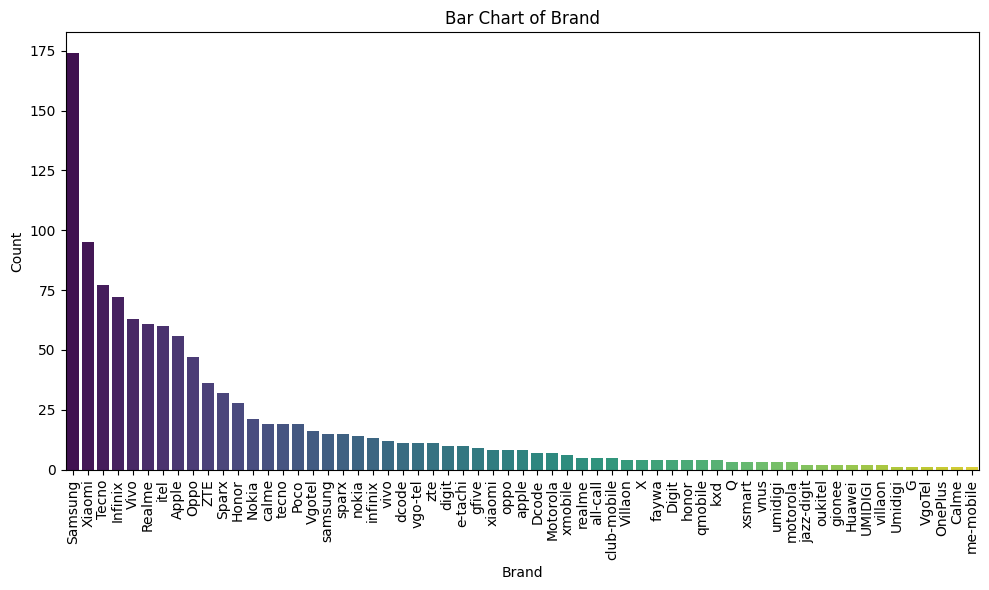

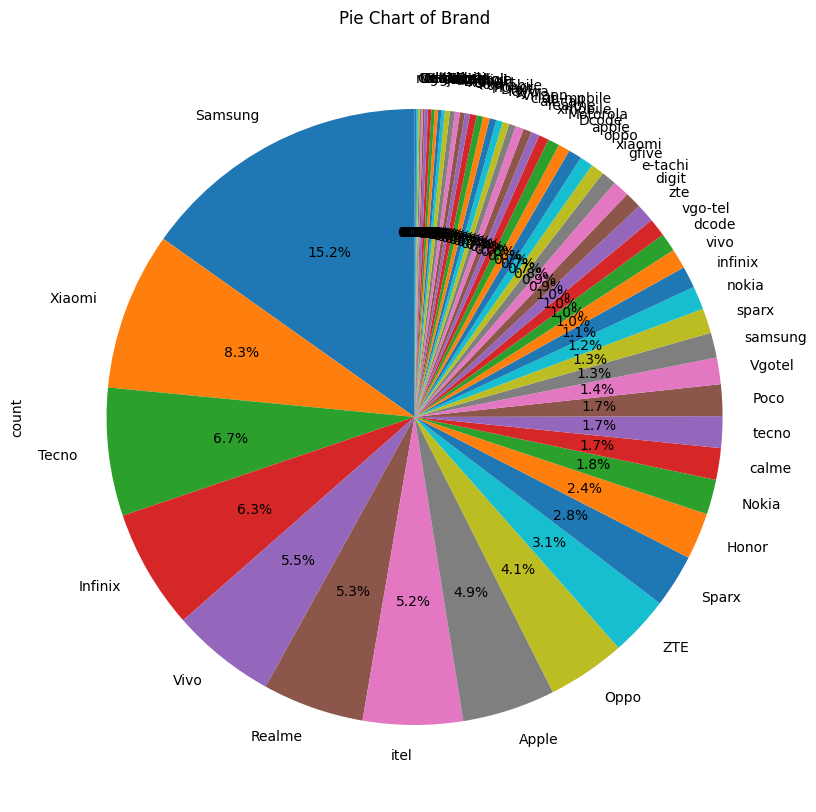

Value Counts for Model:
Model
Galaxy S24 Ultra            14
Galaxy A05                   9
Galaxy Z Flip 5              8
Redmi 12                     7
Redmi Note 13 4G             7
                            ..
Nokia C22                    1
Samsung Galaxy S24 Ultra     1
GFive Style 4G               1
itel A17                     1
GFive 4G Style               1
Name: count, Length: 572, dtype: int64 



<ipython-input-689-272778d83854>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')


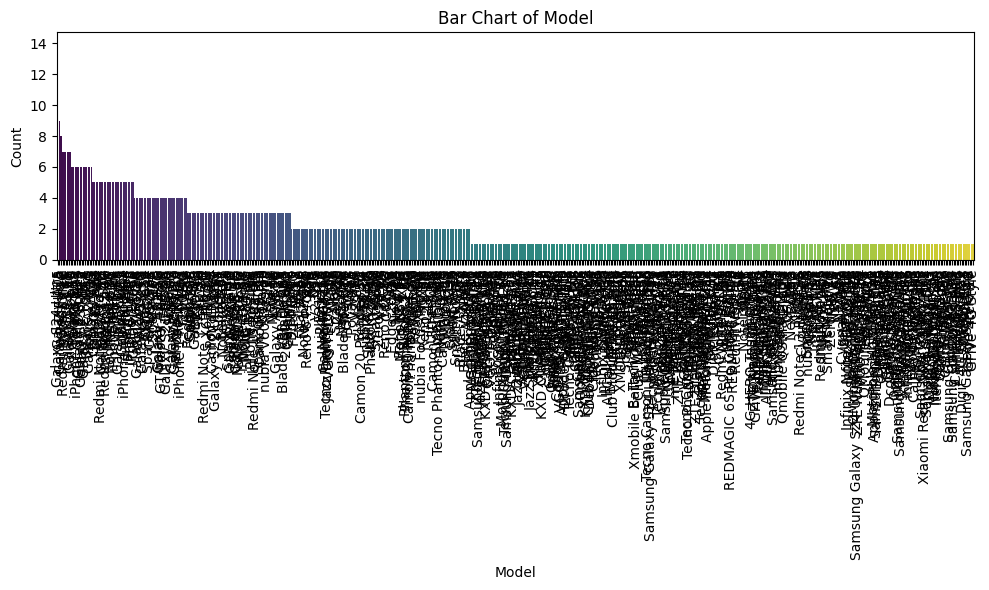

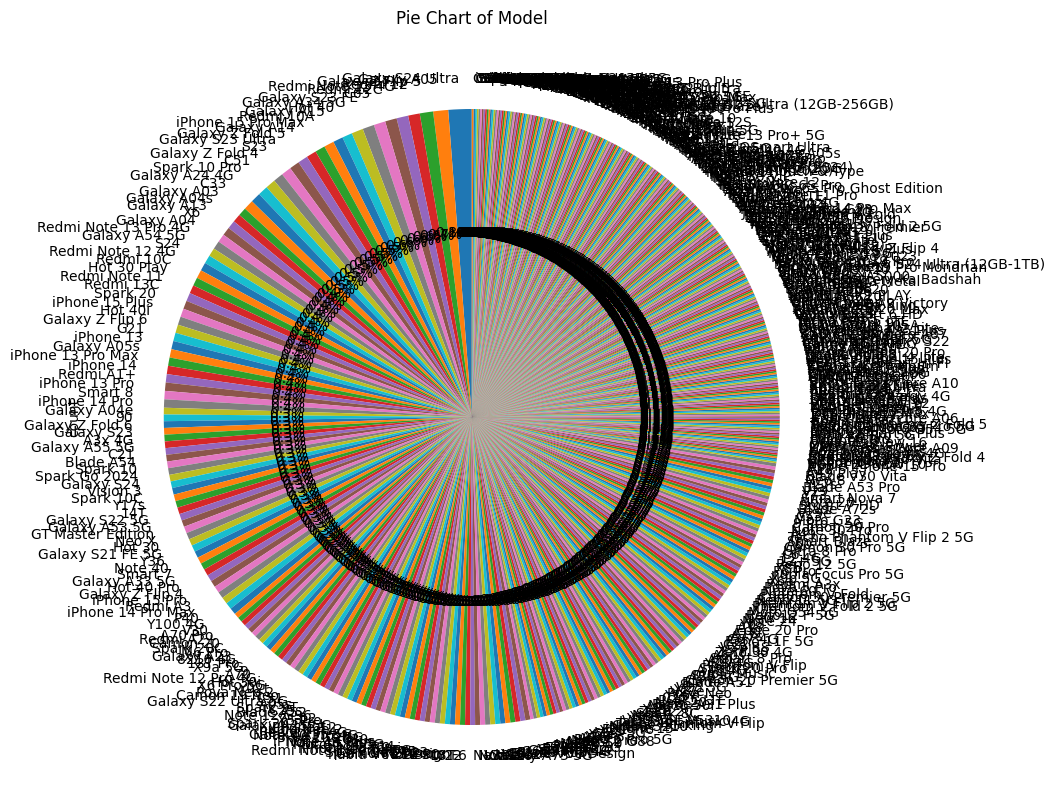

In [ ]:
def analyze_categorical(data, column):
    print(f"Value Counts for {column}:")
    print(data[column].value_counts(), "\n")

    # Bar Chart
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

  # Pie Chart
    plt.figure(figsize=(10, 10))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {column}')
    plt.show()

categorical_columns = ['Brand', 'Model']
for col in categorical_columns:
    analyze_categorical(data, col)

# **Bivariate Analysis**

**Continues Variables (Scatter Plot)**

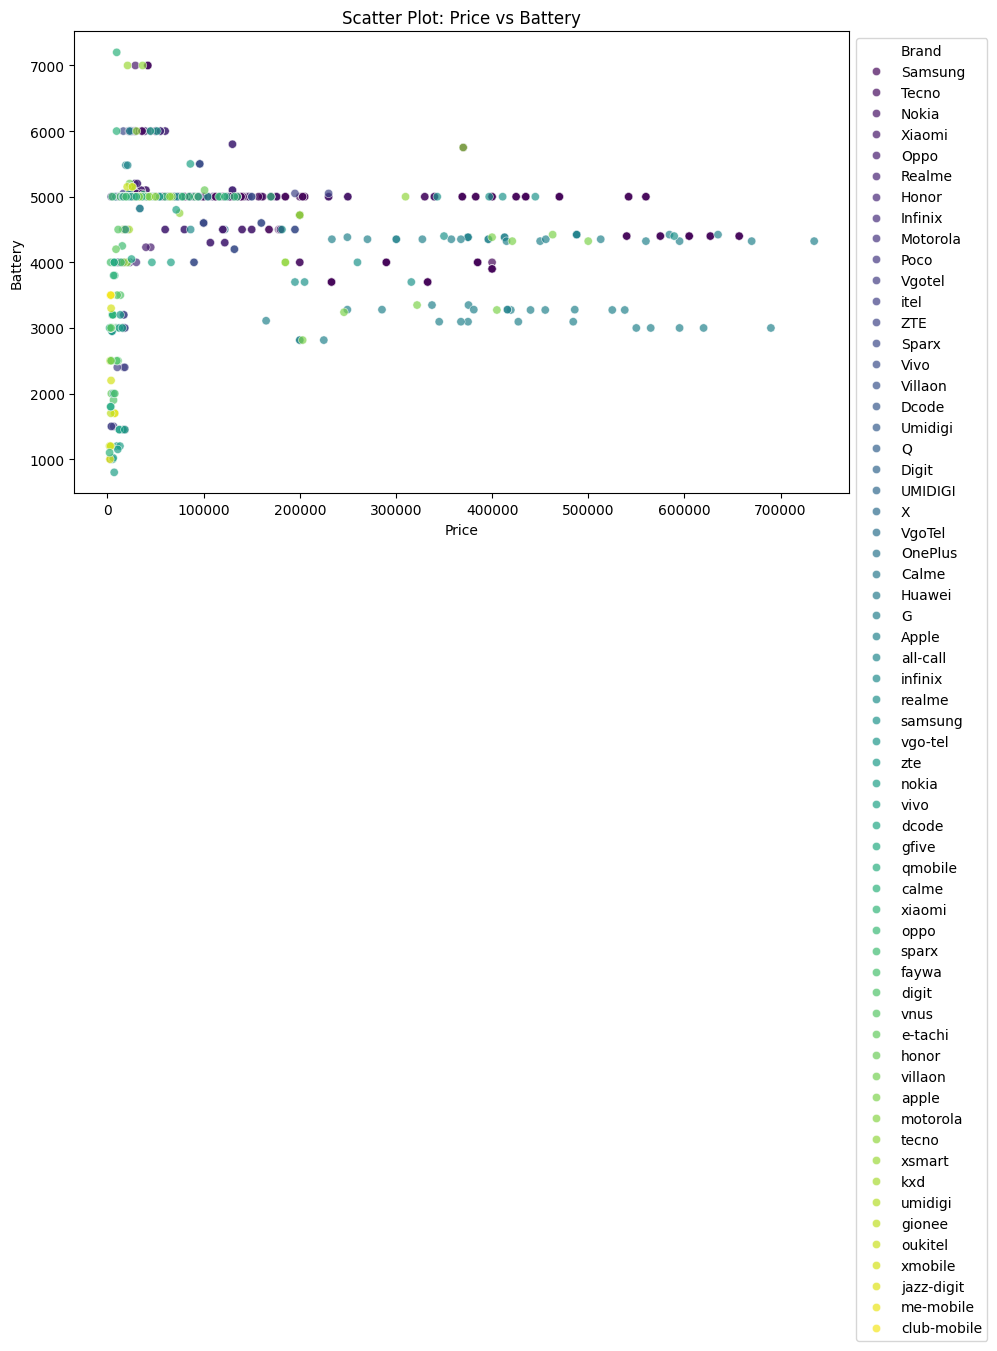

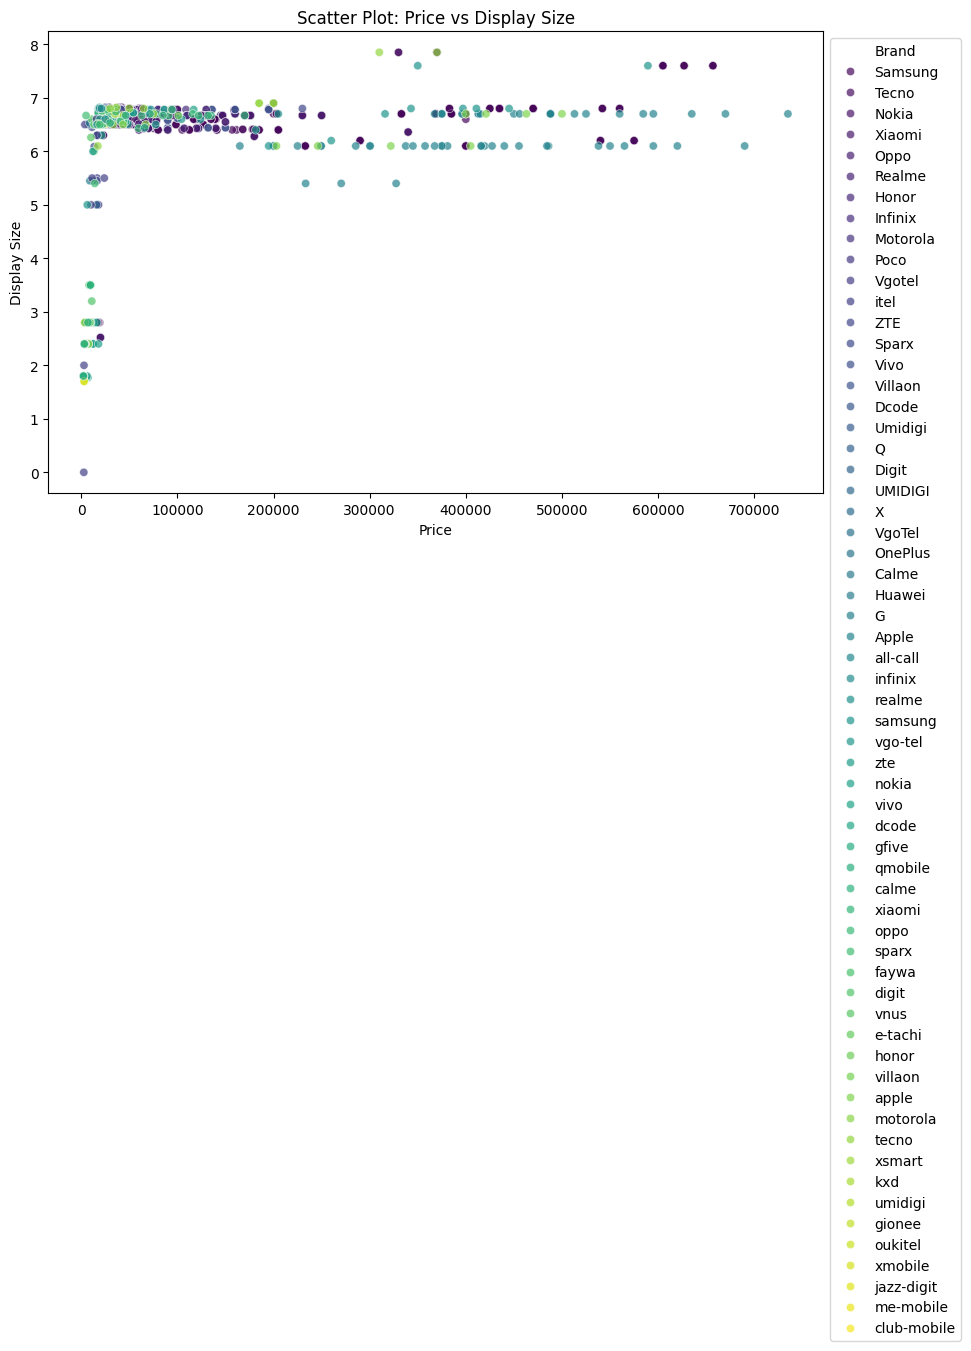

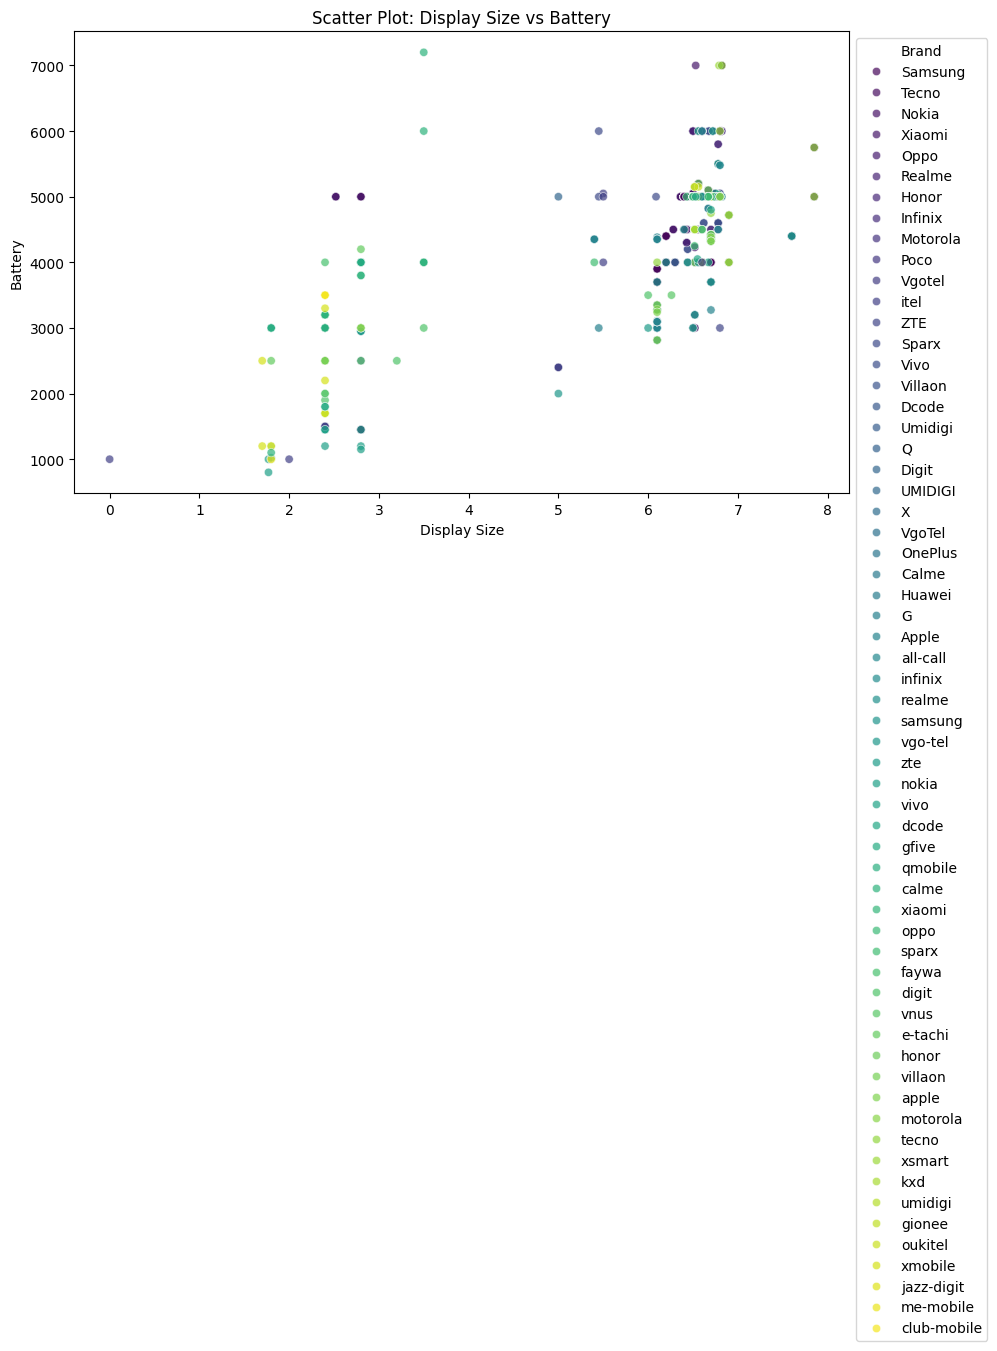

In [ ]:
def bivariate_scatter(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x, y=y, hue='Brand', palette='viridis', alpha=0.7)
    plt.title(f'Scatter Plot: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title='Brand', bbox_to_anchor=(1, 1))
    plt.show()

bivariate_scatter(data, 'Price', 'Battery')
bivariate_scatter(data, 'Price', 'Display Size')
bivariate_scatter(data, 'Display Size', 'Battery')


**Correlation Matrix for Numerical Variables**

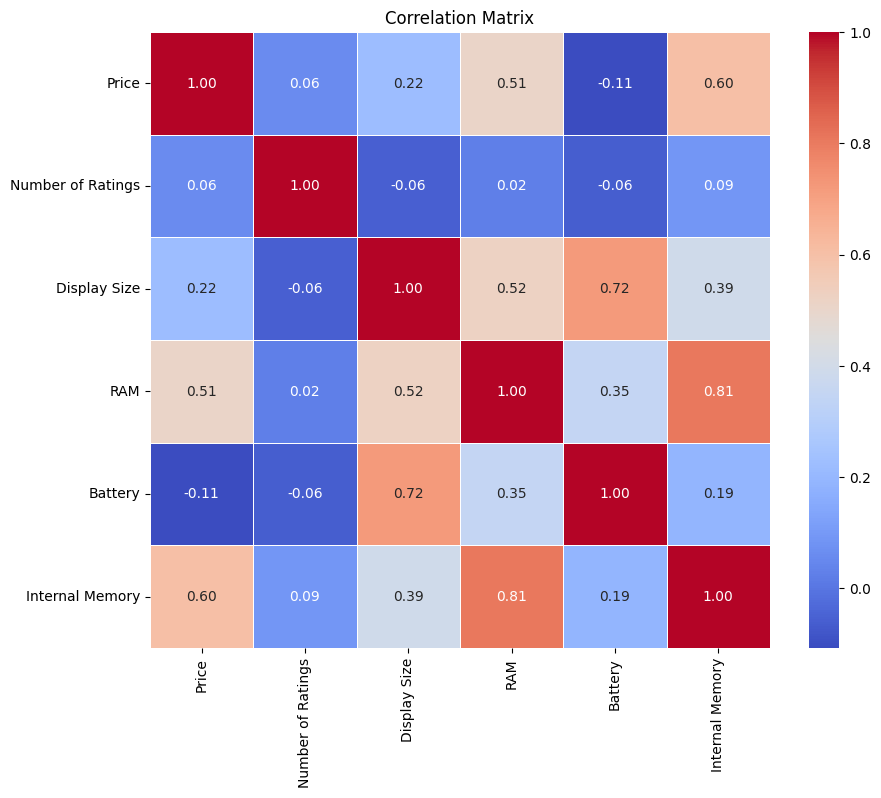

In [ ]:
def correlation_matrix(data, numerical_columns):
    corr = data[numerical_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

numerical_columns = ['Price', 'Number of Ratings', 'Display Size', 'RAM', 'Battery', 'Internal Memory']

correlation_matrix(data, numerical_columns)


**Multivariate Analysis (Pair Plot)**

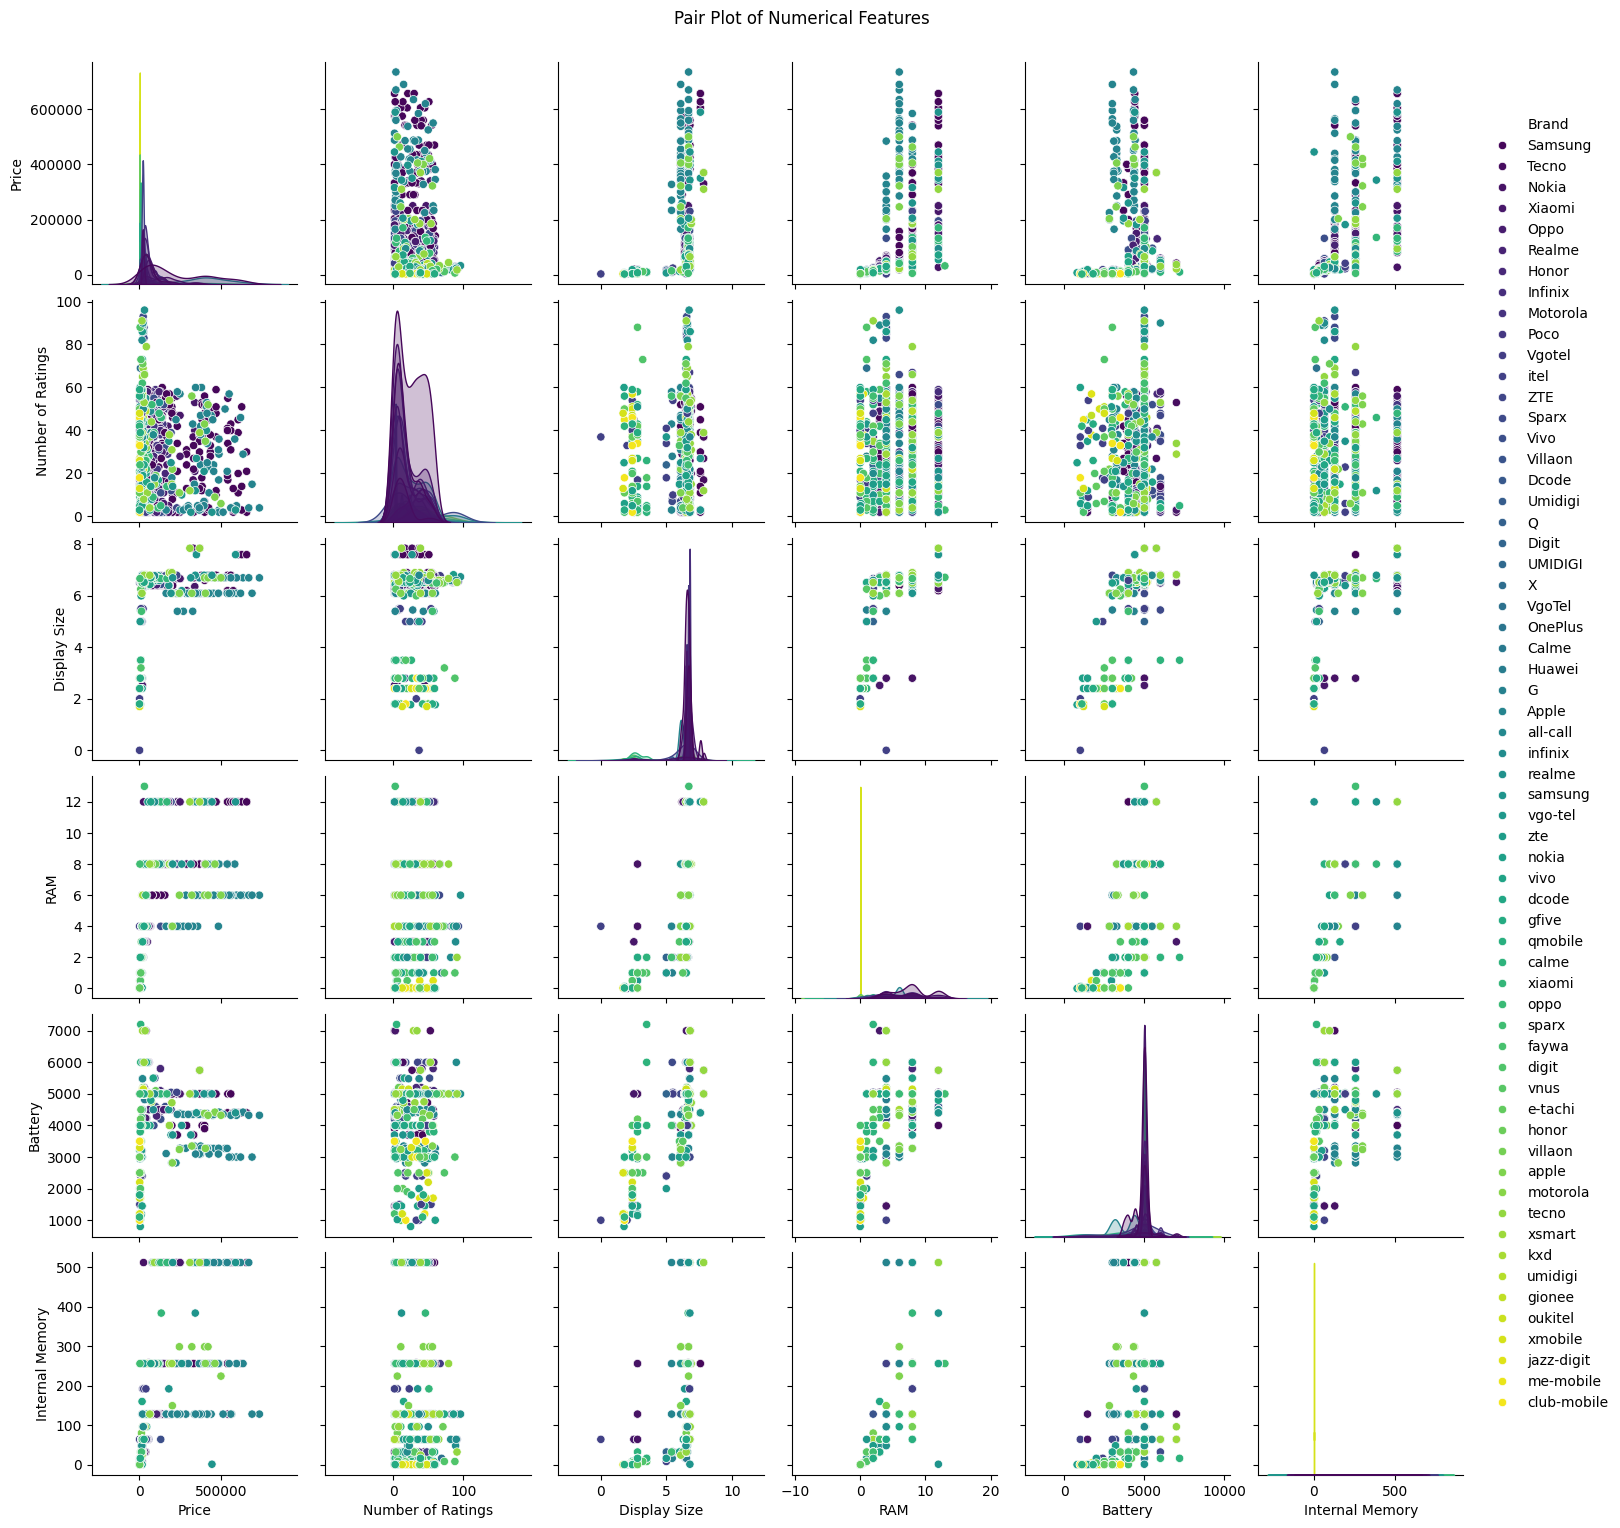

In [ ]:
def multivariate_pairplot(data, numerical_columns):
    sns.pairplot(data[numerical_columns + ['Brand']], hue='Brand', palette='viridis', diag_kind='kde')
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.show()

multivariate_pairplot(data, numerical_columns)

# **Continuous Features**

**Analysis with Target Variable**

In [ ]:
# Define the target variable (e.g., 'Price') and feature categories
target_variable = 'Price'
numerical_features = ['Number of Ratings', 'Display Size', 'RAM', 'Battery', 'Internal Memory']
categorical_features = ['Brand']

Correlation with Target Variable:
Number of Ratings    0.060682
Display Size         0.218017
RAM                  0.508495
Battery             -0.107318
Internal Memory      0.603234
dtype: float64 



<ipython-input-694-d78342fd324e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")


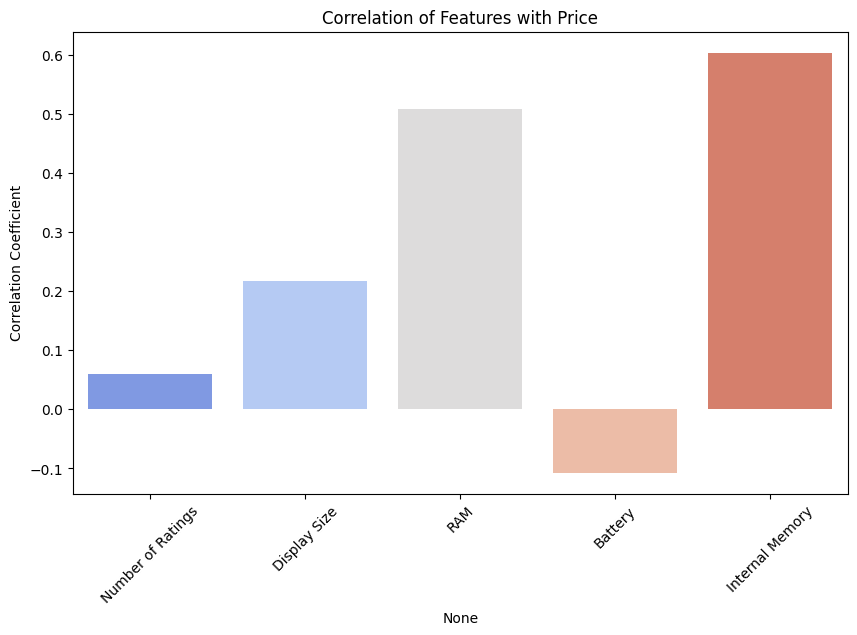

In [ ]:
def correlation_with_target(data, numerical_columns, target):
    correlations = data[numerical_columns].corrwith(data[target])
    print("Correlation with Target Variable:")
    print(correlations, "\n")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm")
    plt.title(f'Correlation of Features with {target}')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45)
    plt.show()


# Correlation Analysis for Numerical Features
correlation_with_target(data, numerical_features, target_variable)



**Categorical Features: Group-by Summary**

Group Summary for Brand vs Price:
                      mean    median            std  count
Brand                                                     
Apple        425883.928571  415500.0  130341.686315     56
apple        369999.000000  402499.0  104090.619860      8
samsung      269245.866667  259999.0  155608.930256     15
Samsung      229103.448276  140500.0  193473.170877    174
OnePlus      122000.000000  122000.0            NaN      1
...                    ...       ...            ...    ...
faywa          3949.000000    2874.0    2500.999800      4
gionee         3649.000000    3649.0     212.132034      2
xmobile        3615.000000    3772.0     431.805512      6
club-mobile    3259.000000    3499.0     415.932687      5
me-mobile      2299.000000    2299.0            NaN      1

[61 rows x 4 columns] 



<ipython-input-695-1256ab7c72c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_summary.reset_index(), x=categorical_column, y='mean', palette="viridis")


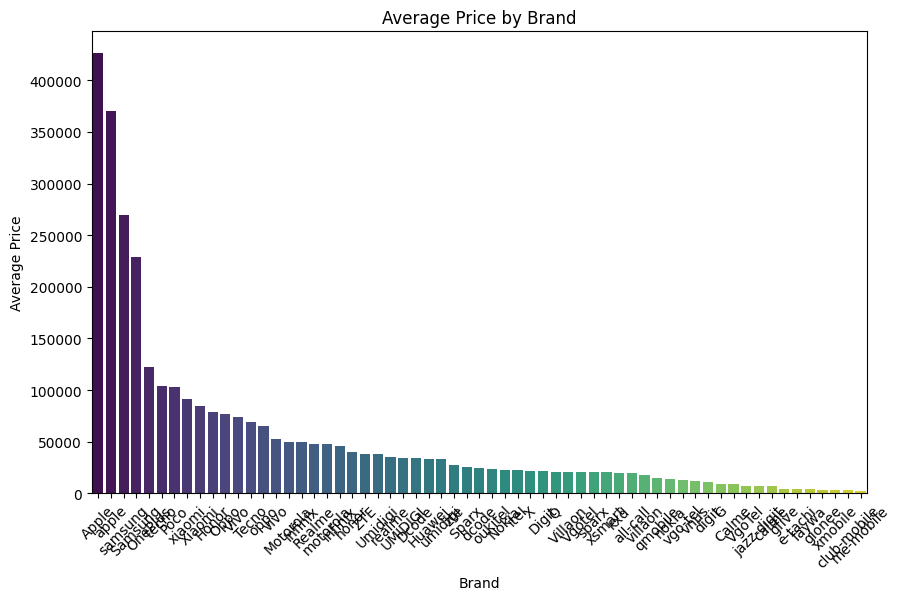

In [ ]:
def categorical_group_summary(data, categorical_column, target):
    group_summary = data.groupby(categorical_column)[target].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
    print(f"Group Summary for {categorical_column} vs {target}:")
    print(group_summary, "\n")

    # Visualize mean of target variable for each category
    plt.figure(figsize=(10, 6))
    sns.barplot(data=group_summary.reset_index(), x=categorical_column, y='mean', palette="viridis")
    plt.title(f'Average {target} by {categorical_column}')
    plt.ylabel(f'Average {target}')
    plt.xlabel(categorical_column)
    plt.xticks(rotation=45)
    plt.show()

# Group Summary for Categorical Features
for cat_col in categorical_features:
    categorical_group_summary(data, cat_col, target_variable)

# **Deleverable 3**

# **Feature Selection**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def feature_variance(data, numerical_columns, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(data[numerical_columns])
    variances = selector.variances_
    feature_variance = dict(zip(numerical_columns, variances))
    return feature_variance

# Call the function to get variances
numerical_columns = ['Price', 'Number of Ratings', 'Display Size', 'RAM', 'Battery', 'Internal Memory']
variances = feature_variance(data, numerical_columns)

# Print variances
for feature, variance in variances.items():
    print(f"{feature}: {variance:.4f}")

Price: 19515217074.8382
Number of Ratings: 393.1940
Display Size: 1.3442
RAM: 10.5599
Battery: 729761.5917
Internal Memory: 17884.2064


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  # Import add_constant
import pandas as pd

# Select relevant columns for multicollinearity check
features = data[['RAM', 'Internal Memory']]

# Add a constant column for the VIF computation
features = add_constant(features)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = features.columns
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif)

           Feature       VIF
0            const  4.596601
1              RAM  2.902371
2  Internal Memory  2.902371


**remove model and number of rating**

In [ ]:
columns_to_include = ['Brand', 'Display Size', 'RAM', 'Battery', 'Internal Memory','Price']

data = data[columns_to_include]

print(data.head())

     Brand  Display Size   RAM  Battery  Internal Memory     Price
1  Samsung          6.70  12.0   4000.0            512.0  385000.0
2  Samsung          7.60  12.0   4400.0            512.0  605000.0
3  Samsung          6.70   4.0   5000.0             64.0   25000.0
4    Tecno          7.85  12.0   5750.0            512.0  370000.0
5    Tecno          6.90   8.0   4720.0            256.0  200000.0


**normalize and standardize the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Apply label encoding to the 'brand' column
data['Brand'] = label_encoder.fit_transform(data['Brand'])

<ipython-input-699-cedd2d15b8be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Brand'] = label_encoder.fit_transform(data['Brand'])


In [ ]:
columns_to_standardize = [ 'Battery', 'Price','RAM', 'Display Size', 'Internal Memory']

# Initialize the Standard Scaler
scaler = StandardScaler()

# Fit and transform the data
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])
# Save the cleaned data after outlier removal
output_file_path = '/content/standardScalar.csv'
data.to_csv(output_file_path, index=False)

# **Train Models**

**RandomForestRegressor Machine Learning Model**

In [ ]:
# Independent and Dependent Variables
X = data.drop(['Price'], axis=1)  # Independent variables
y = data['Price']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Calculate Metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

**Neural Network Deep Learning Model**

In [ ]:

nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)  # Verbose=0 to suppress output
nn_preds = nn_model.predict(X_test)

# Calculate Metrics for Neural Network
nn_mse = mean_squared_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)
nn_mae = mean_absolute_error(y_test, nn_preds)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


# **Model Evaluation**

In [ ]:
# Compare Models
print(f"\nRandom Forest Metrics:")
print(f"MSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, R2 Score: {rf_r2:.2f}")

print(f"\nNeural Network Metrics:")
print(f"MSE: {nn_mse:.2f}, MAE: {nn_mae:.2f}, R2 Score: {nn_r2:.2f}")



Random Forest Metrics:
MSE: 0.03, MAE: 0.09, R2 Score: 0.97

Neural Network Metrics:
MSE: 0.16, MAE: 0.28, R2 Score: 0.83


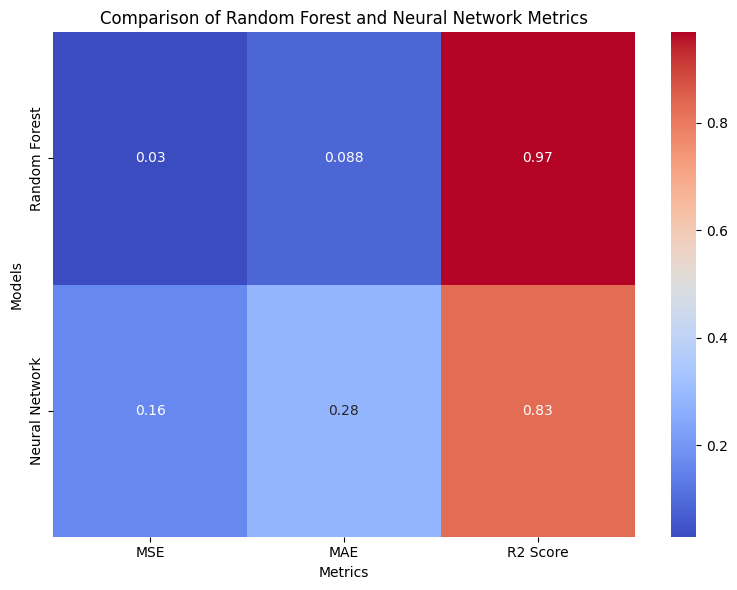

In [ ]:
metrics = ['MSE', 'MAE', 'R2 Score']
values = np.array([[rf_mse, rf_mae, rf_r2],  # Random Forest metrics
                   [nn_mse, nn_mae, nn_r2]])  # Neural Network metrics

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(values, annot=True, cmap='coolwarm', xticklabels=metrics, yticklabels=['Random Forest', 'Neural Network'], cbar=True)

# Title and labels
plt.title('Comparison of Random Forest and Neural Network Metrics')
plt.xlabel('Metrics')
plt.ylabel('Models')

# Display the heatmap
plt.tight_layout()
plt.show()
